# Runner notebook

In this notebook you can run the model that you just trained.


<a id='f'></a>
## 1. Imports

In this section we import the necessary packages

In [52]:
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, r2_score

## 2. User input

Fill your experiment id. This is the id that is given when you run the project with MLflow. When the run is finished, you can see at the end at your terminal the following:

"""
INFO mlflow.projects: === Run (ID 'YOUR_EXPERIMENT_ID') succeeded ===
"""


In [42]:
experiment_id = "c2afba2615ec4f5c8f98e18711ca468d"
file_name_greenhouse = "dummy_greenhouse.csv"
file_name_weather = "dummy_weather.csv"

## 3. Load the model

In this section the model is loaded using the pickle package.

In [44]:
path_model = os.path.abspath(f"../../mlruns/0/{experiment_id}/artifacts/model/model.pkl")
model = pickle.load(open(path_model, 'rb'))

## 4. Load the test data



In [24]:
path_greenhouse_csv = os.path.abspath(f'input/{file_name_greenhouse}')
path_weather_csv = os.path.abspath(f'input/{file_name_weather}')

In [25]:
df_greenhouse = pd.read_csv(path_greenhouse_csv)
df_weather = pd.read_csv(path_weather_csv)

## 5. Preprocess the data



In [26]:
df_greenhouse = df_greenhouse.set_index('time')
df_weather = df_weather.set_index('time')

In [27]:
data = df_weather.join(df_greenhouse)

In [28]:
data = data[["Iglob", "PARout", "Rhout", "Tout", "HumDef", "Tair", "t_heat_sp"]]

In [29]:
data = data.fillna(data.mean())

In [40]:
data = (data
       .assign(t=lambda df: np.arange(len(df.index)) + 1,
            hour_of_day=lambda df: np.arange(len(df.index)) + 1,
            month=6))

In [41]:
data

,Iglob,PARout,Rhout,Tout,HumDef,Tair,t_heat_sp,t,hour_of_day,month
time,,,,,,,,,,
1,0.000000,0.363636,54.718182,13.100000,3.242727,25.681818,24.981818,1,1,6
2,0.000000,0.250000,62.858333,12.200000,3.445000,25.750000,25.250000,2,2,6
3,0.000000,0.000000,69.669231,10.761538,3.307692,25.423077,25.161538,3,3,6
4,0.000000,0.000000,75.709091,10.054545,3.443636,25.327273,24.890909,4,4,6
5,0.000000,0.000000,80.450000,9.441667,3.698333,25.500000,25.183333,5,5,6
6,0.000000,0.000000,82.307692,8.830769,3.685385,25.323077,25.007692,6,6,6
7,3.727273,8.181818,81.554545,8.345455,3.638182,24.554545,24.472727,7,7,6
8,72.833333,107.166667,80.800000,8.375000,4.573333,24.150000,24.550000,8,8,6
9,224.846154,409.461538,77.292308,9.461538,5.910000,25.738462,25.369231,9,9,6


In [46]:
data['model_pred'] = model.predict(data.drop(columns="Tair"))

In [49]:
# Calculate scores. 

r2 = r2_score(data.Tair, data.model_pred).round(3)
mae = mean_absolute_error(data.Tair, data.model_pred).round(3)

# Report. 
print(f'r2 score: {r2}')
print(f'MAE: {mae}')

r2 score: 0.745
MAE: 1.192


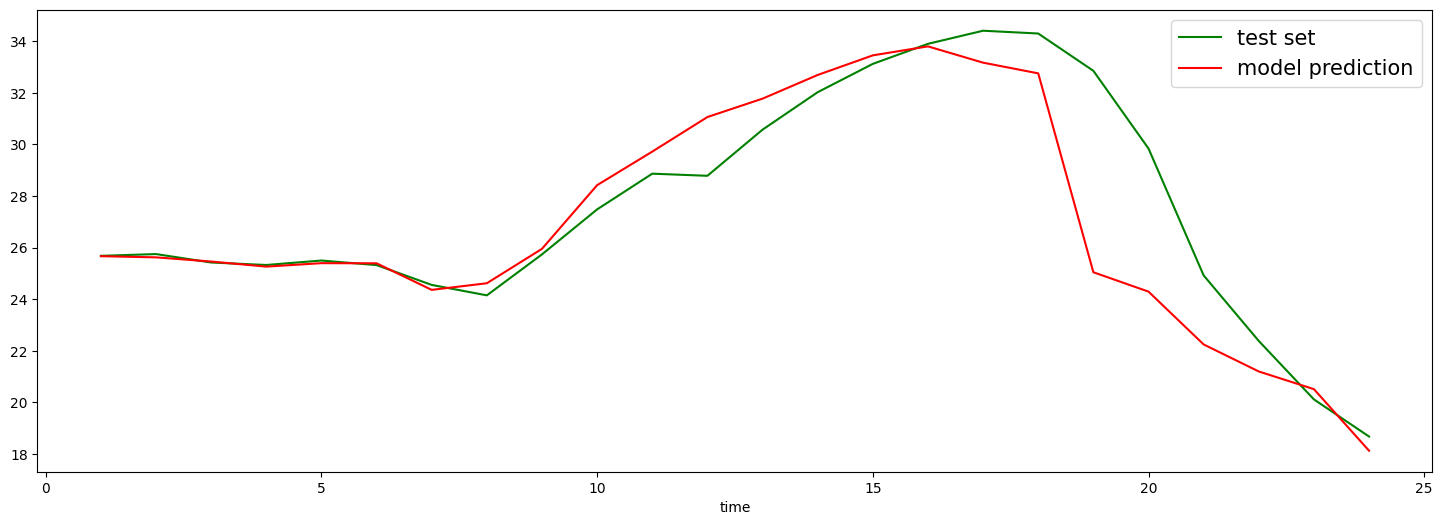

In [53]:
fig, ax = plt.subplots(figsize=(18,6))
data[['Tair']].plot(ax=ax, c='g')
data[['model_pred']].plot(ax=ax, c='red')
ax.legend(["test set", "model prediction"], prop={'size': 15});